#### Task 1 - Permutations and Combinations
##### Problem Statement
Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six have tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, and that they are just guessing. Remember to show and justify your workings in both code and Markdown cells.

Suppose now that you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt if they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes **at most one error**.

Would you accept two errors? Explain your reasoning.


#### The Lady Tasting Tea Experiment
![Lady Tasting Tea](Images/ladytastingtea.PNG)
##### 1.1 Introduction
When working at Rothamsted Research Station in 1919, Ronald Fisher offered a cup of tea to his colleague, Dr. Muriel Bristol. She  declined, explaining that she preferred the milk to be poured into the cup first. Fisher dismissed her request, insisting that the order in which milk was added couldn’t affect the taste. Bristol stood her ground, insisting that she could always tell the difference. William Roach, her future husband, overheard the conversation and suggested that she be tested.

This "Lady Tasting Tea" experiment laid the groundwork for modern hypothesis testing, introducing the concept of formulating a null hypothesis and assessing its validity through experimental data. Fisher's development of statistical methods from this experiment became foundational tools in the field of inferential statistics.

In the experiment, Bristol was presented with eight cups of tea in a random order — four made by adding milk first and four made by adding tea first. Her task was to identify which four cups were prepared using one of these methods. In this hypothetical alternative, the setup involves twelve cups of tea, with six prepared by adding milk first and six by adding tea first. The task remains the same: to correctly identify the six "milk first" cups.

We can now formulate our null and alternative hypotheses:

**Null Hypothesis:**
The lady _cannot_ distinguish between cups of tea where milk was added first and cups where tea was added first. Any correct identifications are due to chance alone.

**Alternative Hypothesis:**
The lady _does_ have special powers and _can_ distinguish between milk-first cups and milk-last cups.


##### 1.2 Using the Combination Formula

It's important to emphasise that we're using *combinations rather than permutations* here since the order in which the cups are chosen doesn't matter. Combinations are used when the arrangement of the selected items is irrelevant, while permutations consider the order, which is not relevant in this case. As we are selecting four cups with milk first from eight cups in total, we care only about which cups are selected, rather than the sequence in which they are chosen.

We therefore use the [combination formula](https://en.wikipedia.org/wiki/Combination) to calculate the number of ways to select a smaller set of cups from a larger set. The formula is used to calculate how many ways we can choose **k** items from a total of **n** items, and it is given by:
<br>
<br>
$${\binom {n}{k}} = \frac{n(n-1)\dotsb (n-k+1)}{k(k-1)\dotsb 1}$$


Where:

- **n!** (n factorial) is the product of all positive integers from 1 to \( n \),
- **k!** is the product of all positive integers from 1 to \( k \),
- **(n-k)!** is the product of all positive integers from 1 to \( (n - k) \).

The method for calculating this in Python's standard library is [math.comb](https://www.w3schools.com/python/ref_math_comb.asp).

##### Probability of selecting 4 milk-first cups
Before we write any code, we can satisfy ourselves of the numbers mathematically by plugging in the figures:
<br><br>



| **Expression**        | **Calculation**                                    | **Result** |
|------------------------|---------------------------------------------------|------------|
| 8!                    | 8 × 7 × 6 × 5 × 4 × 3 × 2 × 1                     | 40,320     |
| 4!                    | 4 × 3 × 2 × 1                                     | 24         |
| (8 − 4)! = 4!         | 4 × 3 × 2 × 1                                     | 24         |
| Number of combinations| 40,320 / (24 × 24) = 40,320 / 576 = 70            | **70**         |

<br> **or** <br>
$$
\binom{8}{4} = \frac{8!}{4!(8-4)!} = \frac{8 \cdot 7 \cdot 6 \cdot 5}{4 \cdot 3 \cdot 2 \cdot 1} = \frac{1680}{24} = \mathbf{70}
$$






In the experiment then, the Lady  had **70** total ways of choosing four cups out of eight when the order of selection was ignored. If the null hypothesis is true, the probability that the lady could correctly select the 4 milk-first cups of tea by chance alone, is **1 in 70**.

In our version of the experiment, we are asked to imagine that twelve rather than eight cups of tea are presented to the Lady. Lets now plug in our updated figures:
<br><br>

| **Expression**        | **Calculation**                                      | **Result**    |
|------------------------|-----------------------------------------------------|---------------|
| 12!                   | 12 × 11 × 10 × 9 × 8 × 7 × 6 × 5 × 4 × 3 × 2 × 1     | 479,001,600   |
| 6!                    | 6 × 5 × 4 × 3 × 2 × 1                               | 720           |
| (12 − 6)! = 6!        | 6 × 5 × 4 × 3 × 2 × 1                               | 720           |
| Number of combinations| 479,001,600 / (720 × 720) = 479,001,600 / 518,400 = 924 | **924**           |

<br> **or** <br>


$$
\binom{12}{6} = \frac{12!}{6!(12-6)!} = \frac{12 \cdot 11 \cdot 10 \cdot 9 \cdot 8 \cdot 7}{6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1} = \frac{665280}{720} = \textbf{924}
$$

<br>

The Lady now has **924** ways of selecting six milk-first cups out of twelve total cups. Or: if the null hypothesis is true, the probability that the lady could correctly select the 4 milk-first cups of tea by chance alone, is **1 in 924**.
In order to code this, we'll start off by importanting the necessary libraries:

In [211]:
import itertools
import random
import numpy as np
import math
import matplotlib.pyplot as plt

We'll define our variables and plug them into the combination formula:

In [212]:
# Adapted from https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/02_lady_tasting_tea.ipynb

# Let's define our variables - n = number of cups; k = number of cups with milk in first
n = 8 
k = 4  

# Calculate the number of combinations
combination = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

print(f"In Fisher's experiment, the number of ways to choose {k} milk-first from {n} cups is: {combination}")


In Fisher's experiment, the number of ways to choose 4 milk-before-tea from 8 cups is: 70


This is the value we expected from our manual calculations. 
##### 1.3 Probability of selecting 6 milk-first cups
We'll now amend this code to calculate the numer of ways to choose 6 milk-first from 12 cups:

In [192]:
# Let's define our variables - n = number of cups; k = number of cups with milk in first
n = 12  
k = 6  

# Calculate the number of combinations
combination = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

print(f"In our version of the experiment, the number of ways to choose {k} milk-before-tea cups from {n} cups is: {combination}")


In our version of the experiment, the number of ways to choose 6 milk-before-tea cups from 12 cups is: 924


This is the figure we expected from our manual calculations. Below is an adapted version of code from our lecture, amended to reflect that we are now dealing with six cups rather than four.

In [216]:
## Code adapted from https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/02_lady_tasting_tea.ipynb
no_cups = 12
no_cups_milk_first = 6

# The cup labels.
labels = list(range(no_cups))
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Select six cups at random to put milk in first, sort the labels and then turn labels_milks to a set
labels_milk = random.sample(labels, 6)
labels_milk.sort()
set(labels_milk)

# Calculate the overlap between each element of combs and labels_milk.
no_overlaps = []

## This for loop iteraates through each combination, converts it & labels_milk into sets and finds the intersection/common elements 
## between them. Our count of overlapping elements is then appended to no_overlaps for each combo
for comb in combs:
    s1 = set(comb)
    s2 = set(labels_milk)
    overlap = s1.intersection(s2)
    no_overlaps.append(len(overlap))

# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

Before we create the plot, We want to extract unique overlap. Lets print the frequencies of overlaps:

In [220]:

overlaps = counts[0]  
frequencies = counts[1]  

print("Overlaps and their frequencies:")
print()
for overlap, frequency in zip(overlaps, frequencies):
    print(f"Overlap: {overlap}, Frequency: {frequency}")


Overlaps and their frequencies:

Overlap: 0, Frequency: 1
Overlap: 1, Frequency: 36
Overlap: 2, Frequency: 225
Overlap: 3, Frequency: 400
Overlap: 4, Frequency: 225
Overlap: 5, Frequency: 36
Overlap: 6, Frequency: 1


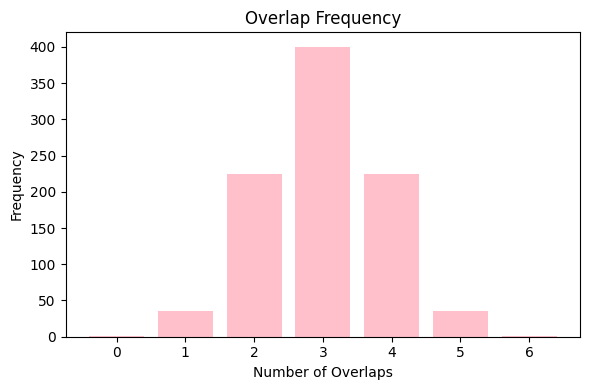

In [194]:

# Let's start our bar chart 
## Have changed the colour of the bars to pink
fig, ax = plt.subplots(figsize=(6, 4))
pink = '#FFC0CB'  
ax.bar(counts[0], counts[1], color=pink)

# Have added labels and our title
ax.set_xlabel('Number of Overlaps')
ax.set_ylabel('Frequency')
ax.set_title('Overlap Frequency')

# plt.show to display our chart
plt.tight_layout()
plt.show()


##### 1.4 Probablity of making at least one error

In [195]:
# k is the number of correct cups i.e. with milk first, which is 6 in this case
# n is the total number of cups available to choose from, so 12.

# As calculated previously, our total possible combinations of selecting 6 cups out of 12
totalcombos = math.comb(n, 6)
print("The total number of combinations we have is", totalcombos)
print()

# Calculate all the combinations that invlolve just 1  error
oneerror = math.comb(k, 5) * math.comb(n - k, 1)
print("The total number of combinations that involve just one error is", oneerror)
print()


# To get the probability of getting one wrong cup, we will divide the ways of getting one error by the total number of combinations
proboneerror = round(oneerror / totalcombos, 2)

print("Probability of selecting exactly one wrong cup:", proboneerror)




The total number of combinations we have is 924

The total number of combinations that involve just one error is 36

Probability of selecting exactly one wrong cup: 0.04


##### 1 .5 Probability of getting two errors

In [196]:

## Number of cups
n = 12
k = 6  # Number of cups with milk

totalcombos = math.comb(n, 6)
print("The total number of combinations we have is", totalcombos)
print()

## We now calculate the ways to get exactly two errors by plugging in the relevant figures
twoerrors = math.comb(k, 4) * math.comb(n - k, 2)

print("The number of ways to get exactly two errors is:", twoerrors)
print()


## To get the probability of getting two errors, we will divide the ways of gettig two error by the total number of combos
probtwoerrors = round(twoerrors / totalcombos, 2)

print("Probability of selecting two cups incorrectly (or 924/225 is):", probtwoerrors)



The total number of combinations we have is 924

The number of ways to get exactly two errors is: 225

Probability of selecting two cups incorrectly (or 924/225 is): 0.24


Is this acceptable then?

[1]: https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786 "Irish Times Article"
[2]: https://towardsdatascience.com/lady-tasting-tea-a-bayesian-approach-1b0b94ca1530 "Towards Data Science - Bayesian Approach"
[3]: https://en.wikipedia.org/wiki/Combination "Combination - Wikipedia"

### References

1. [How a tea-tasting test led to a breakthrough in statistics - Irish Times][1]  
2. [Lady Tasting Tea: A Bayesian Approach - Towards Data Science][2]  
3. [The Combination Formula - Wikipedia][3]  
 



#### Task 2: numpy's Normal Distribution
"In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm, stats

In [198]:
## We are asked to generate 100,000 values from a normal distribution with mean 10.0 and SD 3.0
sample = np.random.normal(loc=10.0, scale=3.0, size=100000)

In [199]:
## Calculate the mean and SD, rounded to two decimal places
mean = round(np.mean(sample), 2)
sd = round(np.std(sample), 2)

# Display the mean and standard deviation, 
print("μ:", mean)
print("σ", sd, "\n")

μ: 9.98
σ 3.0 



In [200]:
## Display the first five values in the sample, rounded to two decimal places

print("The first five values in our sample are:" "\n")
for val in sample[:5]:
    print(round(val, 2))

The first five values in our sample are:

10.36
6.02
8.0
14.71
16.13


In [201]:
# Let's run the Shapiro-Wilk test for normality
# Documentation is at https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

shapiro_test = shapiro(sample)
print("The Shapiro-Wilk Test Statistic is", round(shapiro_test.statistic, 2))
print("The associated p-value is", round(shapiro_test.pvalue, 2))


The Shapiro-Wilk Test Statistic is 1.0
The associated p-value is 0.34


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


It should be noted that [the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) contains a caveat that when N is greater than 5000, the test statistic is accurate, but that the p-value may not be. 

"If the p-value is “small” - that is, if there is a low probability of sampling data from a normally distributed population that produces such an extreme value of the statistic - this may be taken as evidence against the null hypothesis in favor of the alternative: the weights were not drawn from a normal distribution." (SciPy, n.d.) The threshold for values considered “small” should be decided before analyzing the data, with careful consideration of the risks of false positives (i.e. incorrectly rejecting the null hypothesis) and false negatives (failing to reject a false null hypothesis). For this analysis, I have chosen a significance level of 0.05.

Since the p-value is .69, we don't have sufficient evidence to reject the null hypothesis. Our data suggests that the plot does not significantly deviate from a normal distribution. It's therefore reasonable to conclude that numpy.random.normal() function is likely producing normally distributed values as expected.

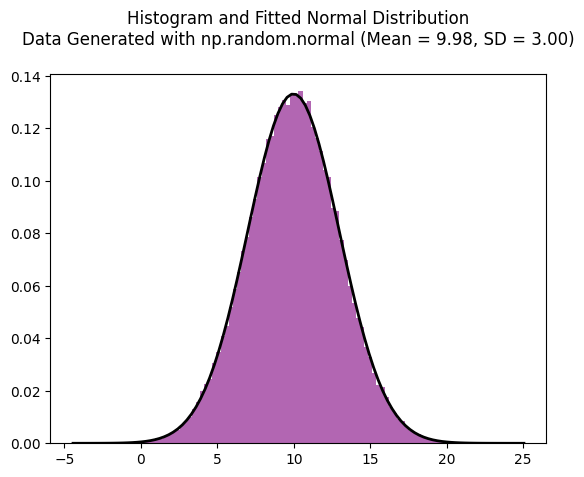

In [202]:
# Adapted from https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/

# Lets fit a normal distribution to the sample data
mean, sd = norm.fit(sample) 

# Plot the histogram with 100 bins (rather than 50) for a smoother fit and set the colour to purple

plt.hist(sample, bins=100, density=True, alpha=0.6, color='purple')

# Then we plot the probability density function.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, sd)

plt.plot(x, p, 'k', linewidth=2)

# Added a title 
title = "Fit Values: {:.2f} and {:.2f}".format(mean, sd)
title = (
    "Histogram and Fitted Normal Distribution\n"
    "Data Generated with np.random.normal (Mean = {:.2f}, SD = {:.2f})\n"
    .format(mean, sd, mean, sd)
)
plt.title(title)

plt.show()



[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

### References


1. [SciPy Documentation: "scipy.stats.shapiro" - SciPy][4]  

#### Task 3: t-Test Calculation

##### Problem statement

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

|          | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
|----------|----|----|----|----|----|----|----|----|----|----|
| **Before**   | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| **After**    | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |


Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

#### Introduction
We'll start by importing the relevant libraries


In [203]:

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

Initially, I created two numpy arrays to explore the data. However, since I wanted to get descriptive statistics and create visualisations, I went with a pandas dataframe instead.  The dataframe contains the heart rates before and after the exercise programme.

In [204]:
# Lets create a pandas dataframe called heartrate so that we can manipulate the data. 
import pandas as pd

# Data
heartrate = {
    'Patient_ID': range(1, 11),
    'Before': [63, 68, 70, 64, 74, 67, 70, 57, 66, 65],
    'After': [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]
}

df = pd.DataFrame(heartrate)
print(df)


   Patient_ID  Before  After
0           1      63     64
1           2      68     64
2           3      70     68
3           4      64     64
4           5      74     73
5           6      67     70
6           7      70     72
7           8      57     54
8           9      66     61
9          10      65     63


We'll use the [`.describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas-dataframe-describe) function to get descriptive statistics for the 'Before' and 'After' conditions.


In [205]:

before = df['Before'].describe()
after = df['After'].describe()

print("Descriptive Statistics - Before exercise programme:\n", before)
print("\nDescriptive Statistics - After exercise programme:\n", after)


Descriptive Statistics - Before exercise programme:
 count    10.00000
mean     66.40000
std       4.64758
min      57.00000
25%      64.25000
50%      66.50000
75%      69.50000
max      74.00000
Name: Before, dtype: float64

Descriptive Statistics - After exercise programme:
 count    10.000000
mean     65.300000
std       5.677441
min      54.000000
25%      63.250000
50%      64.000000
75%      69.500000
max      73.000000
Name: After, dtype: float64


Before we carry our t-tests, it's important to check that our data is approximately normally distributed. If the data isn't normally distributed, then it's not appropriate to carry out parametric tests such as the paired t-test. I'll create a histrogram of the before exercise condition of the after exercise condition and then one of them overlapping.

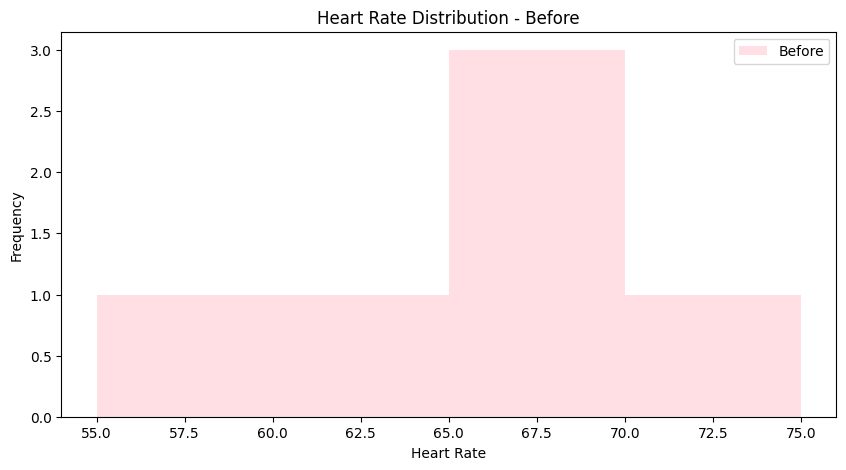

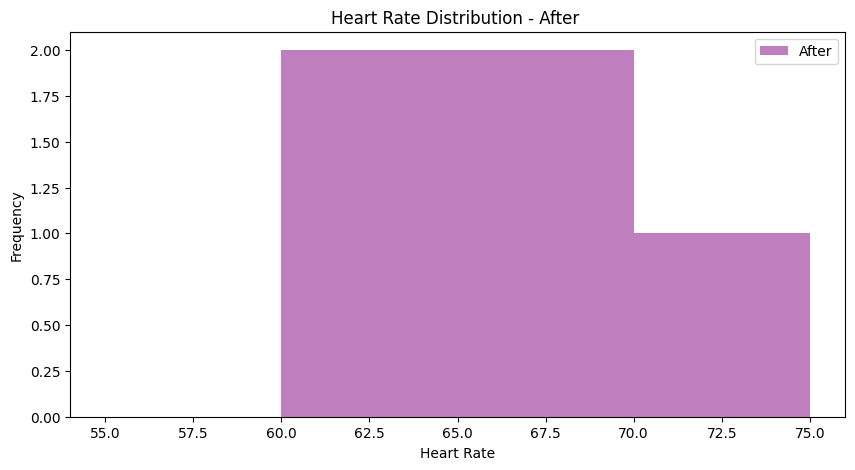

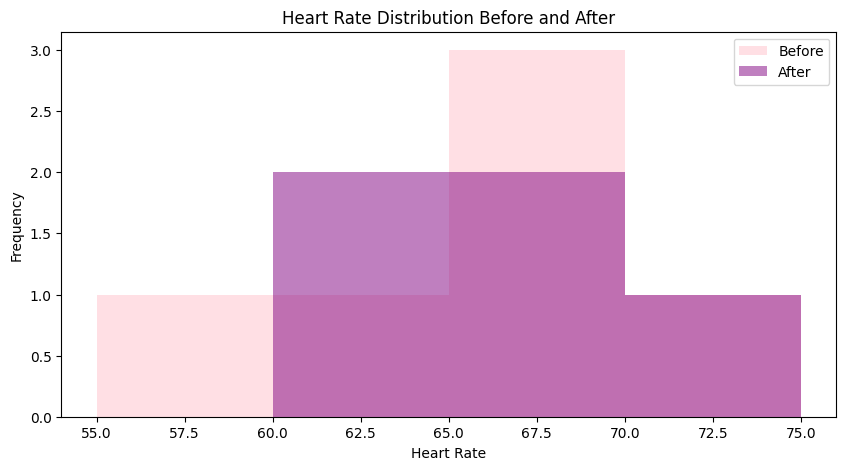

In [206]:
# Before
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(before, bins=range(55, 80, 5), color='pink', alpha=0.5, label='Before')
ax.set_xlabel("Heart Rate")
ax.set_ylabel("Frequency")
ax.set_title("Heart Rate Distribution - Before")
ax.legend()
plt.show()

# After
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(after, bins=range(55, 80, 5), color='purple', alpha=0.5, label='After')
ax.set_xlabel("Heart Rate")
ax.set_ylabel("Frequency")
ax.set_title("Heart Rate Distribution - After ")
ax.legend()
plt.show()

# Overlapping
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(before, bins=range(55, 80, 5), color='pink', alpha=0.5, label='Before')
ax.hist(after, bins=range(55, 80, 5), color='purple', alpha=0.5, label='After')
ax.set_xlabel("Heart Rate")
ax.set_ylabel("Frequency")
ax.set_title("Heart Rate Distribution Before and After")
ax.legend()
plt.show()


#### Calculation in python
Now we need to calculate the t-statistic. Since the experimental design involves collecting two values for each individual, one before and one after the exercise programme, it is appropriate to use a paired t-test. The steps for calculating the test are outlined [here](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/paired-sample-t-test/). One has to:

1. Calculate the mean difference (d̄) of the sample.

\[
$\bar{d} = \frac{d_1 + d_2 + \dots + d_n}{n}$
\]

2. Calculate the standard deviation of the sample.

$\hat{\sigma} = \sqrt{\frac{(d_1 - \bar{d})^2 + (d_2 - \bar{d})^2 + \dots + (d_n - \bar{d})^2}{n - 1}}$

3. Plug in these values and calculate the test statistic.

$t = \frac{\bar{d} - 0}{\hat{\sigma} / \sqrt{n}}$

4. Determine the likelihood of observing the test statistic if the null hypothesis were true.

In [207]:

# Step 1
df['Difference'] = df['After'] - df['Before']
mean_diff = df['Difference'].mean()

print("Mean difference (d̄):", mean_diff)

Mean difference (d̄): -1.1


In [208]:
# Step 2
squared_devs= (df['Difference'] - mean_diff) ** 2
sum_squared_devs = squared_devs.sum()
n = len(df) 
var_diff = sum_squared_devs / (n - 1)
std_diff = round(np.sqrt(var_diff), 2)

print("Standard deviation of the sample (σ̂):", std_diff)

Standard deviation of the sample (σ̂): 2.6


In [209]:
# Step 3
t_stat = round(mean_diff / (std_diff / np.sqrt(n)), 2)
print("T-statistic (t):", t_stat)

T-statistic (t): -1.34


The t-statistic is -1.34. Now, we can see how this compares to the result when we use scipy.

In [210]:
t_stat2, p_value_scipy = stats.ttest_rel(df['After'], df['Before'])

# Display the results
print("t-statistic (scipy):", round(t_stat2, 2))
print("p-value (scipy):", round(p_value_scipy, 4))


t-statistic (scipy): -1.34
p-value (scipy): 0.214


#### Task 4: ANOVA
#### Problem Statement

In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called ``no_type_ii` and set it to 0.

Now use a loop to perform the following test 10,000 times.

Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`.

Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.

Summarize and explain your results.

[1]: https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786 "Irish Times Article"
[2]: https://towardsdatascience.com/lady-tasting-tea-a-bayesian-approach-1b0b94ca1530 "Towards Data Science - Bayesian Approach"
[3]: https://en.wikipedia.org/wiki/Combination "Combination - Wikipedia"
[4]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

### References

1. [How a tea-tasting test led to a breakthrough in statistics - Irish Times][1]  
2. [Lady Tasting Tea: A Bayesian Approach - Towards Data Science][2]  
3. [The Combination Formula - Wikipedia][3]  
4. [SciPy Documentation: "scipy.stats.shapiro" - SciPy][4]  

